In [2]:
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt
import bisect
from pyomo.opt import SolverStatus, TerminationCondition

In [4]:
# build function for each scenario
def v_1(y):  
    return 0.5*y**2

v_list = [v_1]

# lower bound and upper bound
ylb = -1
yub = 1
# build model for each scenario 
m1 = ConcreteModel()
m1.y = Var(bounds=(ylb, yub))
m1.x1 = Var()
m1.c1 = Constraint(expr=m1.x1 == m1.y**2)
m1.obj_expr = Expression(expr=0.5*m1.x1)

model_list = [m1]

In [3]:
# build function for each scenario
def v_1(y):  
    return - np.sqrt(np.abs(y))

def v_2(y): 
    return -(y-1)**2+1

v_list = [v_1, v_2]

# build model for each scenario 
m1 = ConcreteModel()
m1.y = Var(bounds=(0, 1))
m1.x1 = Var(bounds=(0, 1))
m1.x11 = Var(bounds=(0, None))
m1.c1 = Constraint(expr=m1.x11**2 == m1.y**2)
m1.c2 = Constraint(expr=m1.x11 == (m1.x1)**2)
m1.obj_expr = Expression(expr=-m1.x1)

m2 = ConcreteModel()
m2.y = Var(bounds=(0, 1))
m2.x2 = Var()
m2.c1 = Constraint(expr=m2.x2 == -(m2.y-1)**2)
m2.obj_expr = Expression(expr=m2.x2+1)

model_list = [m1, m2]
# lower bound and upper bound
ylb = 0
yub = 0.2

In [ ]:
# build function for each scenario
def v_1(y):  
    return (y**2-1)**2-1/2

v_list = [v_1]

# lower bound and upper bound
ylb = -1.5
yub = 1.5
bounds = [ylb, yub]
# build model for each scenario 
m1 = ConcreteModel()
m1.y = Var(bounds=(ylb, yub))
m1.x1 = Var(bounds=(0, None))
m1.c1 = Constraint(expr=m1.x1 == m1.y**2)
m1.obj_expr = Expression(expr=(m1.x1-1)**2-1/2)

model_list = [m1]
result = nc_underest([ylb, yub],model_list,8,True, v_list)

In [ ]:
# build function for each scenario
def v_1(y):  
    return -y**2

v_list = [v_1]

# lower bound and upper bound
ylb = -1
yub = 1
# build model for each scenario 
m1 = ConcreteModel()
m1.y = Var(bounds=(ylb, yub))
m1.x1 = Var()
m1.c1 = Constraint(expr=m1.x1 == m1.y**2)
m1.obj_expr = Expression(expr=-m1.x1)

model_list = [m1]
# make delta list
result = nc_underest([ylb, yub],model_list,5,True, v_list)

# P1

In [ ]:
# build function for each scenario
def v_1(y):  
    return - np.sqrt(np.abs(y))

def v_2(y): 
    return np.sqrt(np.abs(y))

v_list = [v_1, v_2]

# build model for each scenario 
m1 = ConcreteModel()
m1.y = Var(bounds=(-1, 1))
m1.x1 = Var(bounds=(0, 1))
m1.x11 = Var(bounds=(0, None))
m1.c1 = Constraint(expr=m1.x11**2 == m1.y**2)
m1.c2 = Constraint(expr=m1.x11 == (m1.x1)**2)
m1.obj_expr = Expression(expr=-m1.x1)

m2 = ConcreteModel()
m2.y = Var(bounds=(-1, 1))
m2.x2 = Var(bounds=(0, 1))
m2.c1 = Constraint(expr=m2.x2**2 >= m2.y)
m2.c2 = Constraint(expr=m2.x2**2 >= -m2.y)
m2.obj_expr = Expression(expr=m2.x2)

model_list = [m1, m2]
# lower bound and upper bound
ylb = -0.2
yub = 0.2
bounds = [ylb, yub]

# P3

In [ ]:
# build function for each scenario 
def v_1(y):  
    if y < 5 or y > 20:
        return float('inf')
    elif 5 <= y < 6.53:
        return 2.5 * y - 10 * (2 * y - 10)
    else:
        return 2.5 * y - 10 * 20 / y


def v_2(y): 
    if y < 2.22 or y > 20:
        return float('inf')
    elif 2.22 <= y < 3.49:
        return 2.5 * y - 20 * (4.5 * y - 10)
    else:
        return 2.5 * y - 20 * 20 / y

v_list = [v_1, v_2]




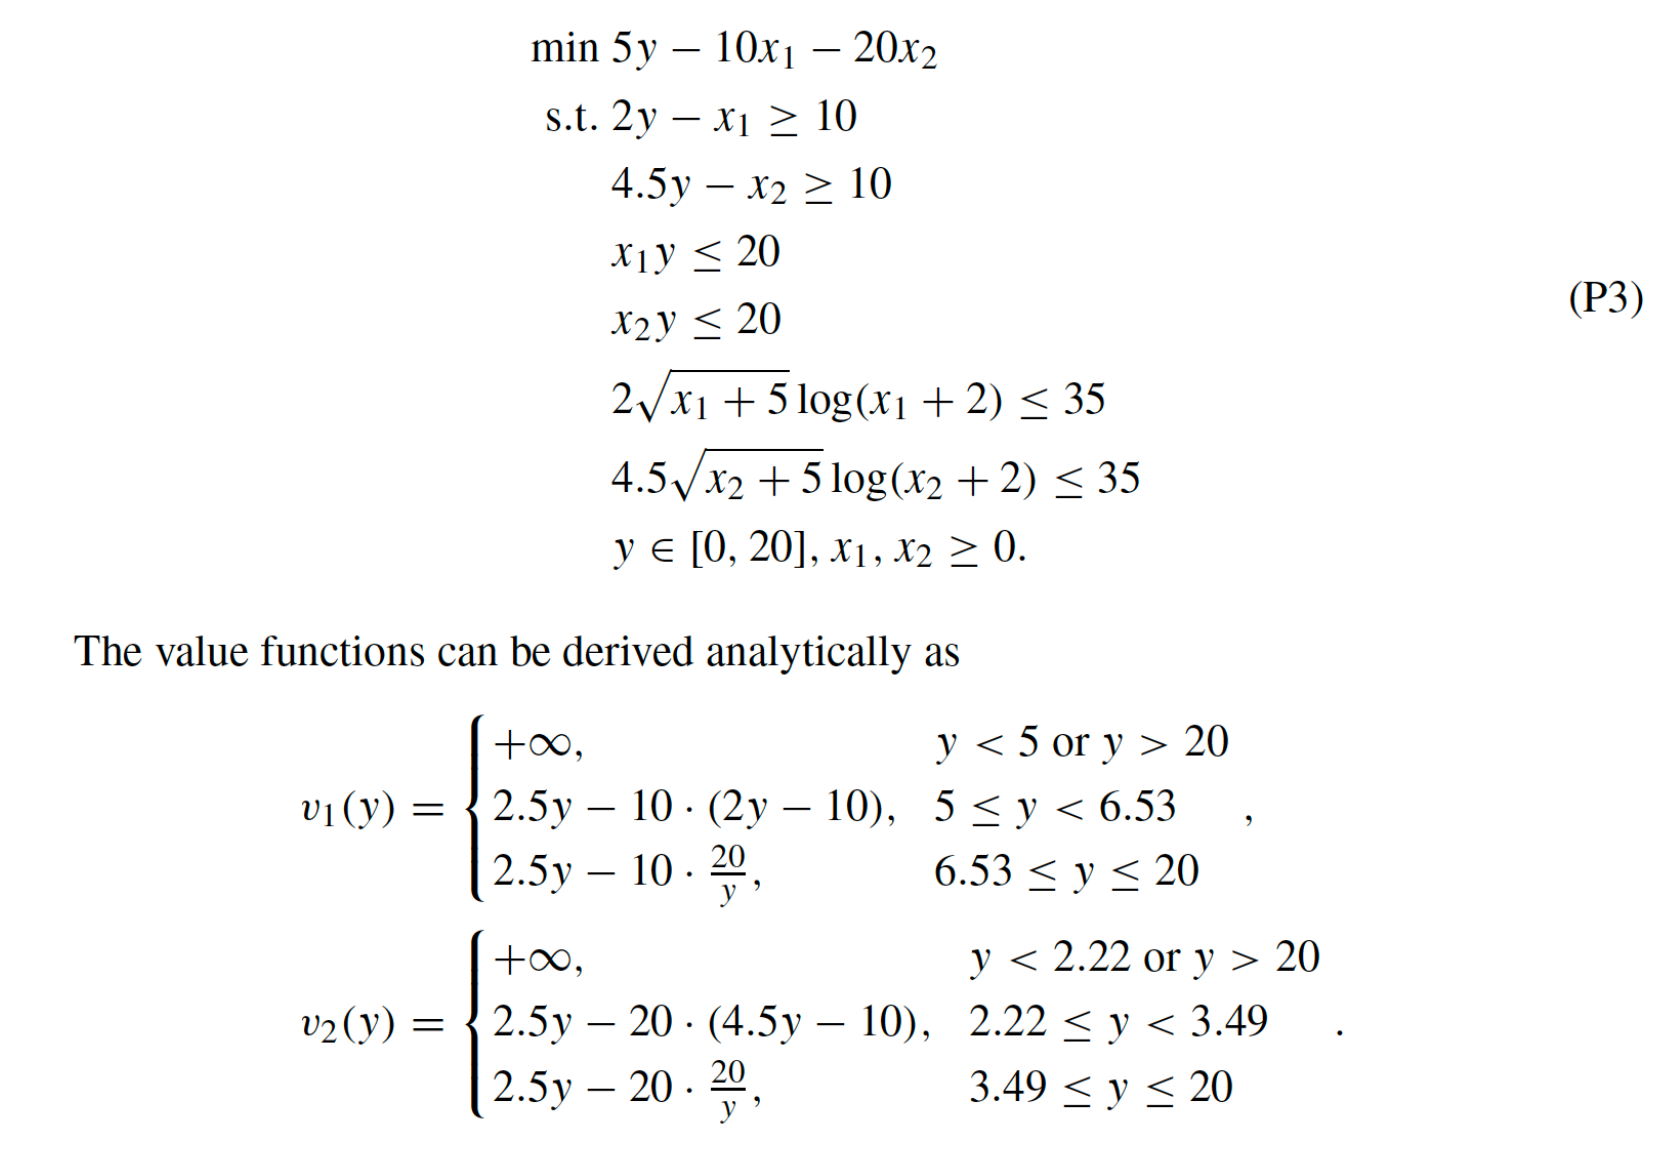

In [ ]:
# build function for each scenario 
def v_1(y):  
    if y < 5 or y > 20:
        return float('inf')
    elif 5 <= y < 6.53:
        return 2.5 * y - 10 * (2 * y - 10)
    else:
        return 2.5 * y - 10 * 20 / y


def v_2(y): 
    if y < 2.22 or y > 20:
        return float('inf')
    elif 2.22 <= y < 3.49:
        return 2.5 * y - 20 * (4.5 * y - 10)
    else:
        return 2.5 * y - 20 * 20 / y

v_list = [v_1, v_2]

# build model for each scenario 
m1 = ConcreteModel()
#m1.y = Var(bounds=(0, 20))
m1.y = Var(bounds=(6, 10))
m1.x1 = Var(bounds=(0, 100))
m1.c1 = Constraint(expr= 2*m1.y-m1.x1>=10)
m1.c2 = Constraint(expr= m1.x1 * m1.y<=20)
m1.c3 = Constraint(expr= 2*sqrt(m1.x1+5)*log(m1.x1+2) <= 35)
m1.obj = Objective(expr= 2.5*m1.y - 10*m1.x1, sense=minimize)

m2 = ConcreteModel()
#m2.y = Var(bounds=(0, 20))
m2.y = Var(bounds=(6, 10))
m2.x2 = Var(bounds=(0, 100))
m2.c1 = Constraint(expr= 4.5*m2.y-m2.x2>=10)
m2.c2 = Constraint(expr= m2.x2 * m2.y<=20)
m2.c3 = Constraint(expr= 4.5*sqrt(m2.x2+5)*log(m2.x2+2) <= 35)
m2.obj = Objective(expr= 2.5*m2.y - 20*m2.x2, sense=minimize)

model_list = [m1, m2]